# Rede Neural para Classificação

3 - Considere um problema de classificação de padrões constituído de oito padrões. A
distribuição dos padrões forma um círculo centrado na origem de raio unitário e contido no
círculo um losango também centrado na origem e com lados iguais a raiz de 2. Os dados das
classe C1, C2, C3, C4 corresponde aos quatro setores do losango e as outras quatro classes
correspondem aos setores delimitados pelo círculo e os lados do losango. Após gerar
aleatoriamente dados que venham formar estas distribuições de dados, selecione um conjunto
de treinamento e um conjunto de validação. Treine uma rede perceptron para classificar os
padrões associados a cada uma das classes. Verifique o desempenho do classificador usando
o conjunto de validação e calculando a matriz de confusão.

### Importando Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
from math import sqrt
import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
import seaborn as srn

### Gerando Dados Aleatórios Para Classificação

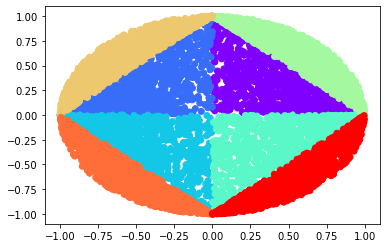

In [2]:
def Gerar_C1(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(0, 1)
        y = random.uniform(0, -x + 1)
        points.append([x, y, 0])
    return points

def Gerar_C2(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(-1, 0)
        y = random.uniform(0, x + 1)
        points.append([x, y, 1])
    return points

def Gerar_C3(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(-1, 0)
        y = random.uniform(-1-x, 0)
        points.append([x, y, 2])
    return points

def Gerar_C4(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(0, 1)
        y = random.uniform(-1+x, 0)
        points.append([x, y, 3])
    return points

def Gerar_C5(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(0, 1)
        y = random.uniform(1 - x, sqrt(1 - x**2))
        points.append([x, y, 4])
    return points

def Gerar_C6(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(-1, 0)
        y = random.uniform(x+1, sqrt(1 - x**2))
        points.append([x, y, 5])
    return points

def Gerar_C7(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(-1, 0)
        y = random.uniform(-sqrt(1 - x**2), -1-x)
        points.append([x, y, 6])
    return points

def Gerar_C8(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(0, 1)
        y = random.uniform(-sqrt(1 - x**2), -1+x)
        points.append([x, y, 7])
    return points

def generate(instancias):
    points = Gerar_C1(instancias) + Gerar_C2(instancias) + Gerar_C3(instancias) + Gerar_C4(instancias) + Gerar_C5(instancias) + Gerar_C6(instancias) + Gerar_C7(instancias) + Gerar_C8(instancias)
    return points

colors = cm.rainbow(np.linspace(0, 1, 8))

res = generate(1000)
#print(res)

data_X = [[row[0], row[1]] for row in res]
data_X = np.array(data_X)
data_y = [row[2] for row in res]
data_y = np.array(data_y)

plt.scatter(data_X[:,0], data_X[:,1], color=colors[data_y])

#plt.legend()
_ = plt.ylim()

data_X, data_y = shuffle(data_X, data_y, random_state=0)

In [3]:
(train_X, test_X, train_y, test_y) = train_test_split(data_X, data_y)

In [4]:
classificador = Sequential()

In [5]:
classificador.add(Dense(units = 12, activation = 'relu', input_dim = 2))
classificador.add(Dense(units = 12, activation = 'relu'))
classificador.add(Dense(units = 8, activation = 'softmax'))
classificador.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [6]:
H = classificador.fit(train_X, train_y, validation_split = 0.2, batch_size=32, epochs = 100)

Epoch 1/100
150/150 [==============================] - 0s 2ms/step - loss: 1.9668 - accuracy: 0.3167 - val_loss: 1.7758 - val_accuracy: 0.3858
Epoch 2/100
150/150 [==============================] - 0s 1ms/step - loss: 1.4917 - accuracy: 0.4654 - val_loss: 1.2501 - val_accuracy: 0.5067
Epoch 3/100
150/150 [==============================] - 0s 1ms/step - loss: 1.0566 - accuracy: 0.5854 - val_loss: 0.9392 - val_accuracy: 0.6225
Epoch 4/100
150/150 [==============================] - 0s 1ms/step - loss: 0.8460 - accuracy: 0.6848 - val_loss: 0.8082 - val_accuracy: 0.6742
Epoch 5/100
150/150 [==============================] - 0s 1ms/step - loss: 0.7434 - accuracy: 0.7175 - val_loss: 0.7318 - val_accuracy: 0.7042
Epoch 6/100
150/150 [==============================] - 0s 1ms/step - loss: 0.6779 - accuracy: 0.7433 - val_loss: 0.6802 - val_accuracy: 0.7100
Epoch 7/100
150/150 [==============================] - 0s 1ms/step - loss: 0.6259 - accuracy: 0.7583 - val_loss: 0.6292 - val_accuracy: 0.7267

In [7]:
previsoes = classificador.predict(test_X)
print(previsoes)

[[1.7734375e-04 1.9546238e-09 2.1964357e-24 ... 5.0508850e-20
  0.0000000e+00 1.7696961e-20]
 [1.8184215e-03 1.1267439e-07 3.5588649e-25 ... 1.2966935e-13
  0.0000000e+00 3.6994136e-36]
 [5.9356251e-05 3.2194675e-05 9.1836811e-04 ... 1.6487153e-23
  1.2525428e-20 4.7916434e-20]
 ...
 [2.3304523e-20 3.8971164e-04 9.9961036e-01 ... 1.0413591e-15
  5.8906791e-09 0.0000000e+00]
 [2.1046663e-04 1.6271542e-08 1.4135935e-27 ... 1.5056755e-12
  0.0000000e+00 0.0000000e+00]
 [5.9184602e-30 6.3765718e-08 9.9979419e-01 ... 8.8707583e-19
  2.0567959e-04 0.0000000e+00]]


In [8]:
precisao = accuracy_score(test_y, np.argmax(previsoes, axis = 1))
print(precisao*100,'%')

97.8 %


In [9]:
matriz = confusion_matrix(test_y, np.argmax(previsoes, axis = 1))
print(matriz)

[[244   0   0   1   2   0   0   0]
 [  1 255   1   0   0   3   0   0]
 [  0   2 249   0   0   0  10   0]
 [  3   0   0 237   0   0   0   4]
 [  4   0   0   0 240   0   0   0]
 [  0   4   0   0   1 260   0   0]
 [  0   0   4   0   0   0 235   0]
 [  0   0   0   3   0   0   1 236]]


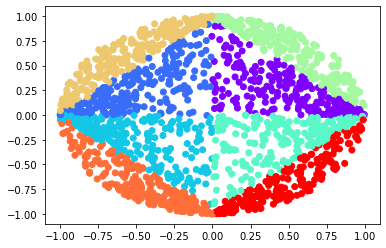

In [10]:
plt.scatter(test_X[:,0], test_X[:,1], color=colors[np.argmax(previsoes, axis = 1)])
_ = plt.ylim()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


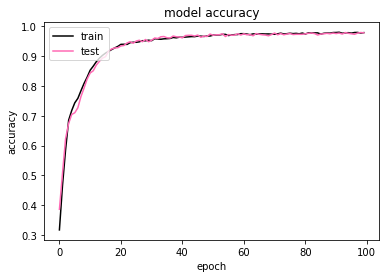

In [19]:
# summarize history for accuracy
print(H.history.keys())  
plt.figure(1)  

# summarize history for accuracy  
plt.plot(H.history['accuracy'], color = 'black')  
plt.plot(H.history['val_accuracy'], color = 'hotpink')  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')

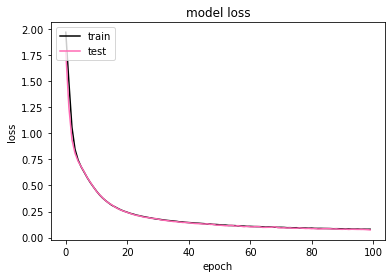

In [17]:
# summarize history for loss
plt.plot(H.history['loss'], color = 'black')
plt.plot(H.history['val_loss'], color = 'hotpink')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()